In [7]:
from pathlib import Path

import pandas as pd
import seaborn as sns

from innovaid.loader import load_set

sns.set_theme(style="darkgrid")
sns.set_context("notebook")

In [2]:
# Run Preprocessing before running this cell
data_path = Path.cwd().parent.parent / "Data"

# This will take a while, about 4 minutes on my system
dataset = load_set(data_path.resolve() / "preprocessed" / "samples")
dataset.head()

Found 3102 files


Loading ZZY7qwXSS8STjlthBKoK: 100%|██████████| 3102/3102 [03:12<00:00, 16.16it/s]


IMAGE_POSITION IMAGE_TYPE  SCENE_INDEX        RX  \
SESSIONID            TIME                                                    
000UccTkf4v2wbRz5AfQ 0             right    neutral          1.0  0.555453   
                     1             right    neutral          1.0  0.549212   
                     2             right    neutral          1.0  0.546846   
                     3             right    neutral          1.0  0.544481   
                     4             right    neutral          1.0  0.551084   

                                 RY RANGE_BDI  
SESSIONID            TIME                      
000UccTkf4v2wbRz5AfQ 0     0.448529      mild  
                     1     0.449412      mild  
                     2     0.452118      mild  
                     3     0.454824      mild  
                     4     0.471765      mild

<Axes: xlabel='RANGE_BDI', ylabel='count'>

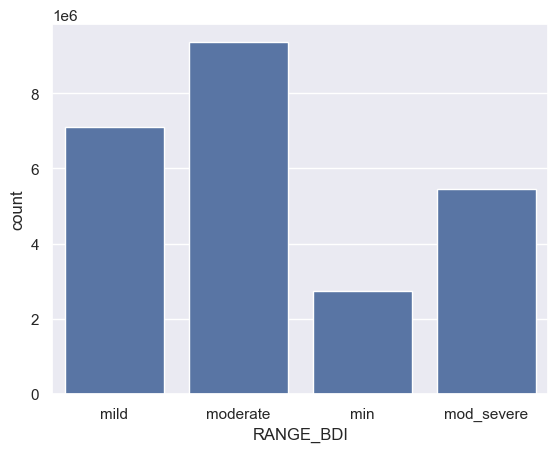

In [13]:
# Find the number of samples in each class
sns.countplot(x="RANGE_BDI", data=dataset)

<Axes: ylabel='Count'>

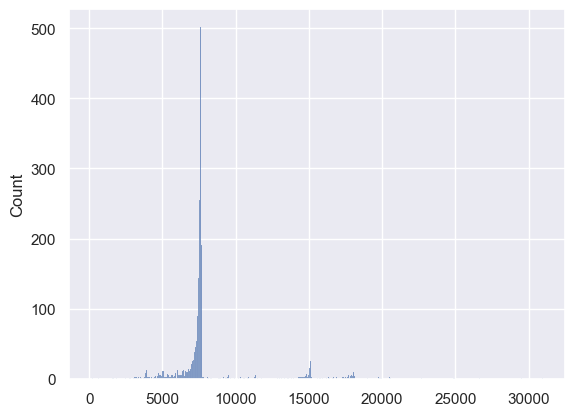

In [14]:
session_lengths = dataset["IMAGE_TYPE"].groupby("SESSIONID").count().to_numpy()
sns.histplot(session_lengths)

In [ ]:
type_mapping = {
    "NONE": 0,
    "positive": 1,
    "negative": 2,
    "neutral": 3,
}
side_mapping = {
    "NONE": 0,
    "left": 1,
    "right": 2,
}
bdi_mapping = {
    "min": 0,
    "mild": 1,
    "moderate": 2,
    "mod_severe": 3,
}

dataset["IMAGE_TYPE"] = dataset["IMAGE_TYPE"].map(type_mapping)
dataset["IMAGE_POSITION"] = dataset["IMAGE_POSITION"].map(side_mapping)
dataset["RANGE_BDI"] = dataset["RANGE_BDI"].map(bdi_mapping)
dataset["SCENE_INDEX"] = dataset["SCENE_INDEX"].astype(int)